In [1]:
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
lineup_stat <- read_csv("https://raw.githubusercontent.com/JerryQi77/DSCI_Group-Project/main/DSCI_Group_project?token=GHSAT0AAAAAABZQJWZPOUAKKT7OY7UAZ33IY2546GQ")
lineup_stat

Rows: 250 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): TEAM, First Player, Second Player, Third Player, Fourth Player, Fi...
dbl (24): ...1, GP, MIN, PTS, FGM, FGA, FG%, 3PM, 3PA, 3P%, FTM, FTA, FT%, O...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,⋯,BLK,BLKA,PF,PFD,+/-,First Player,Second Player,Third Player,Fourth Player,Fifth Player
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0,ORL,19,21.6,52.3,20.4,42.3,48.2,4.3,10.9,⋯,2.2,2.4,8.0,6.9,0.8,E.Fournier,A.Gordon,E.Payton,T.Ross,N.Vucevic
1,MIN,41,21.5,46.3,17.6,37.2,47.4,3.2,9.1,⋯,2.0,2.2,7.8,8.9,-0.9,G.Dieng,Z.LaVine,R.Rubio,K.Towns,A.Wiggins
2,WAS,69,19.5,45.4,17.7,35.9,49.4,4.1,10.1,⋯,1.4,2.0,7.1,7.1,3.4,B.Beal,M.Gortat,M.Morris,O.Porter,J.Wall
3,LAC,46,18.9,44.0,16.2,31.6,51.3,3.8,8.5,⋯,2.0,1.1,6.2,9.3,5.4,B.Griffin,D.Jordan,L.Mbah,C.Paul,J.Redick
4,CLE,27,16.8,40.9,15.3,31.1,49.0,5.0,11.5,⋯,1.4,1.4,5.6,7.1,2.2,K.Irving,L.James,K.Love,J.Smith,T.Thompson
5,CHA,47,16.7,36.2,13.3,29.4,45.1,3.3,9.3,⋯,1.6,2.2,4.6,6.4,1.7,N.Batum,M.Kidd-Gilchrist,K.Walker,M.Williams,C.Zeller
6,PHX,7,16.4,38.3,14.4,29.9,48.3,2.7,7.9,⋯,0.7,1.9,8.4,6.9,0.1,E.Bledsoe,D.Booker,T.Chandler,J.Dudley,T.Warren
7,MIN,38,15.7,34.8,13.3,27.0,49.5,2.2,5.8,⋯,1.4,1.5,5.3,6.2,0.6,G.Dieng,R.Rubio,B.Rush,K.Towns,A.Wiggins
8,CLE,12,15.1,40.2,14.5,27.7,52.4,5.2,10.6,⋯,1.5,1.4,3.5,6.4,9.8,K.Irving,L.James,D.Liggins,K.Love,T.Thompson


In [3]:
renamed_lineup_stat <- rename(lineup_stat, "P_M" = "+/-", 
                    "FGP" = "FG%",
                    "3PP" = "3P%", 
                    "FTP" = "FT%")

In [4]:
final_lineup_stat <- renamed_lineup_stat |>
                 mutate(PIR = PTS + REB + AST + STL + BLK + PFD + FGM - FGA + FTM - FTA - TOV - BLKA - PF) |>
                 mutate(TSP = PTS / ((2 * FGA) + (0.88 * FTA))) |>
                 mutate(PPP = PTS / (FGA + (0.44 * FTA) + TOV)) |>
                 select(PTS, FGP, PIR, TSP, PPP, P_M)
final_lineup_stat

PTS,FGP,PIR,TSP,PPP,P_M
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.3,48.2,58.5,0.5658214,1.0171931,0.8
46.3,47.4,52.5,0.5564904,0.9645833,-0.9
45.4,49.4,51.5,0.5771382,1.0172074,3.4
44.0,51.3,56.1,0.6051937,1.0614687,5.4
40.9,49.0,47.7,0.5975339,1.0589271,2.2
36.2,45.1,42.5,0.5512914,0.9801798,1.7
38.3,48.3,37.4,0.5626396,0.9913034,0.1
34.8,49.5,40.7,0.5776125,1.0021887,0.6
40.2,52.4,50.7,0.6456379,1.1281994,9.8


In [5]:
lineup_split <- initial_split(final_lineup_stat, prop = 0.75, strata = P_M)
lineup_train <- training(lineup_split)

lineup_train |>
   slice(1:5)

lineup_test <- testing(lineup_split)

PTS,FGP,PIR,TSP,PPP,P_M
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30.5,45.6,32.9,0.5295139,0.9413580,-1.6
29.7,49.3,31.8,0.6039531,1.0140672,-4.3
28.5,47.0,28.2,0.5266854,0.9060275,-4.0
24.7,44.9,24.3,0.5436697,0.8785033,-5.1
31.2,49.4,32.9,0.5920753,1.0631048,-0.9


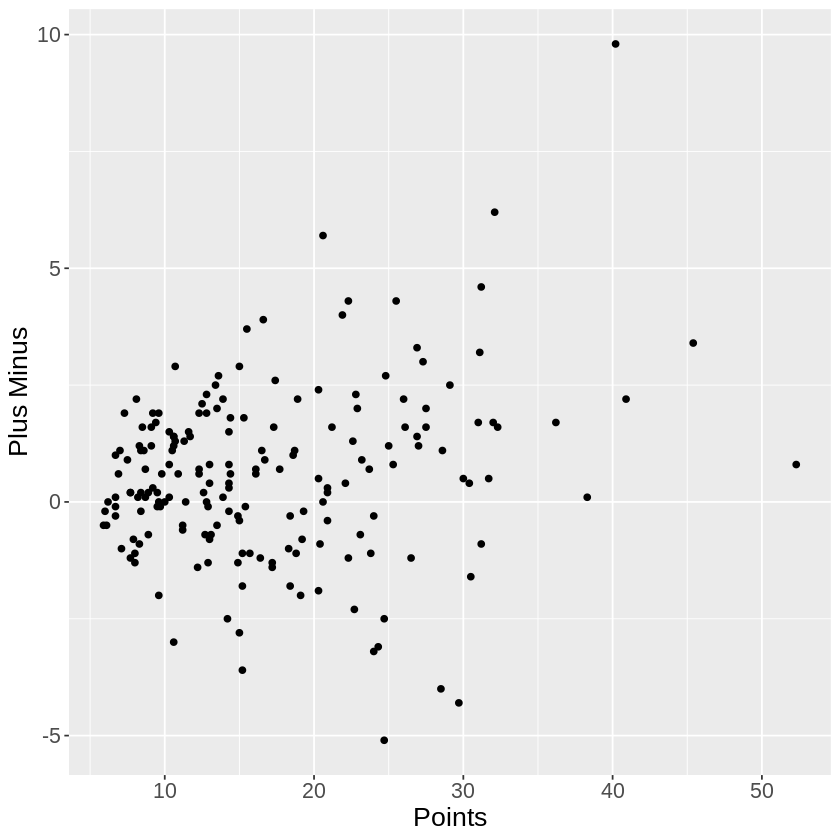

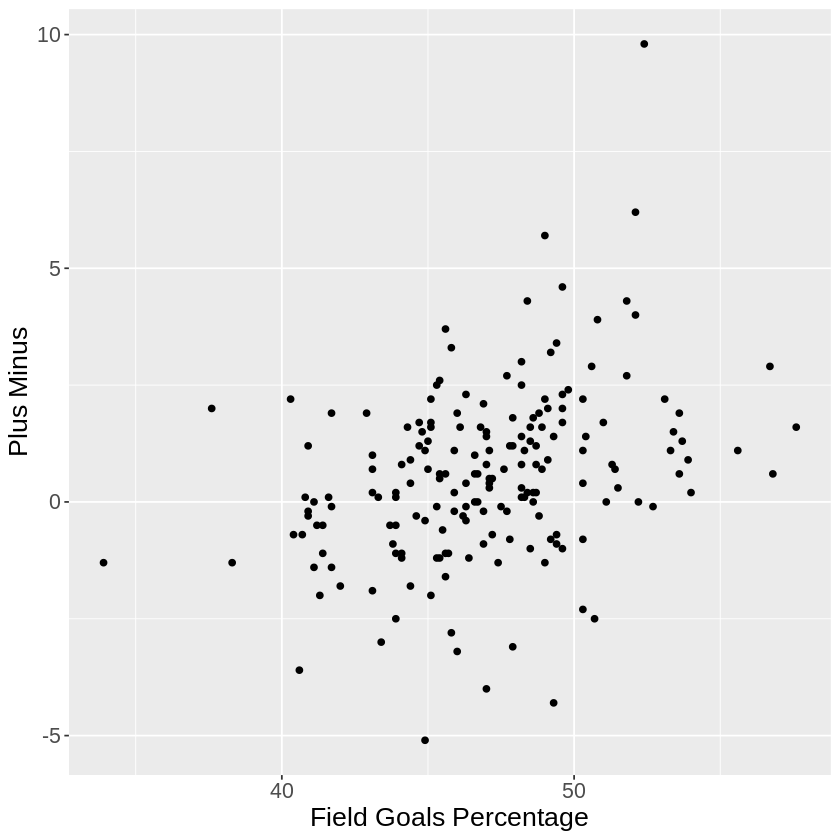

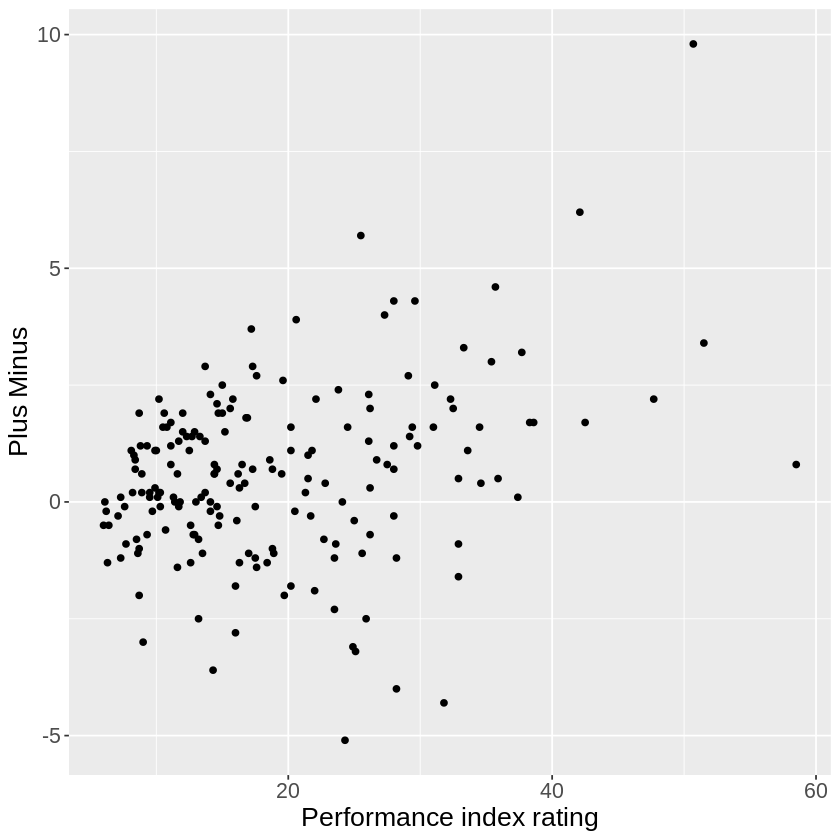

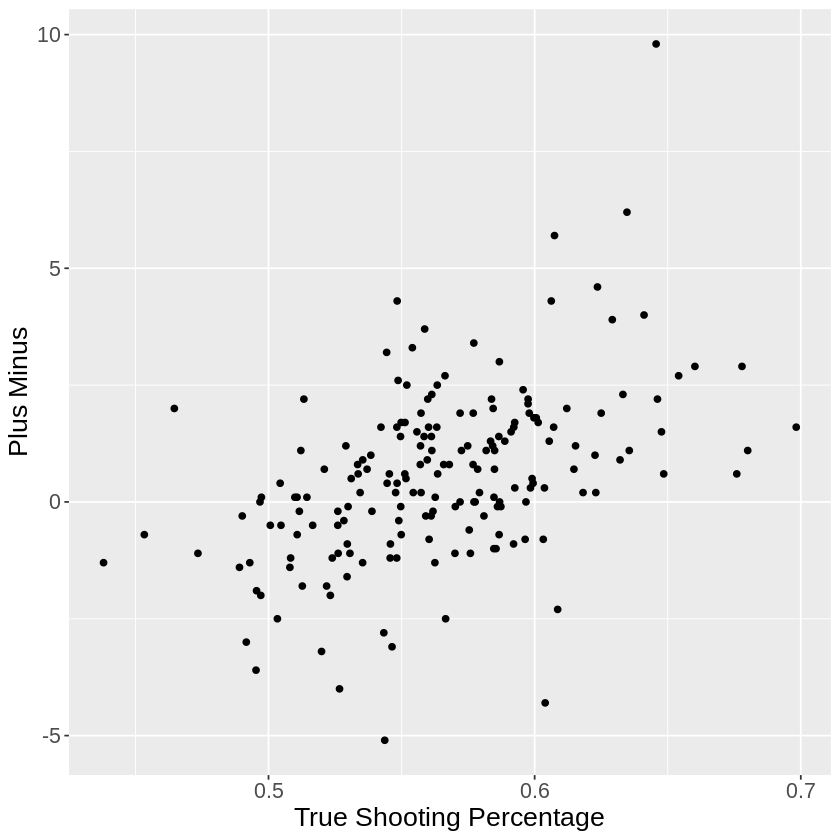

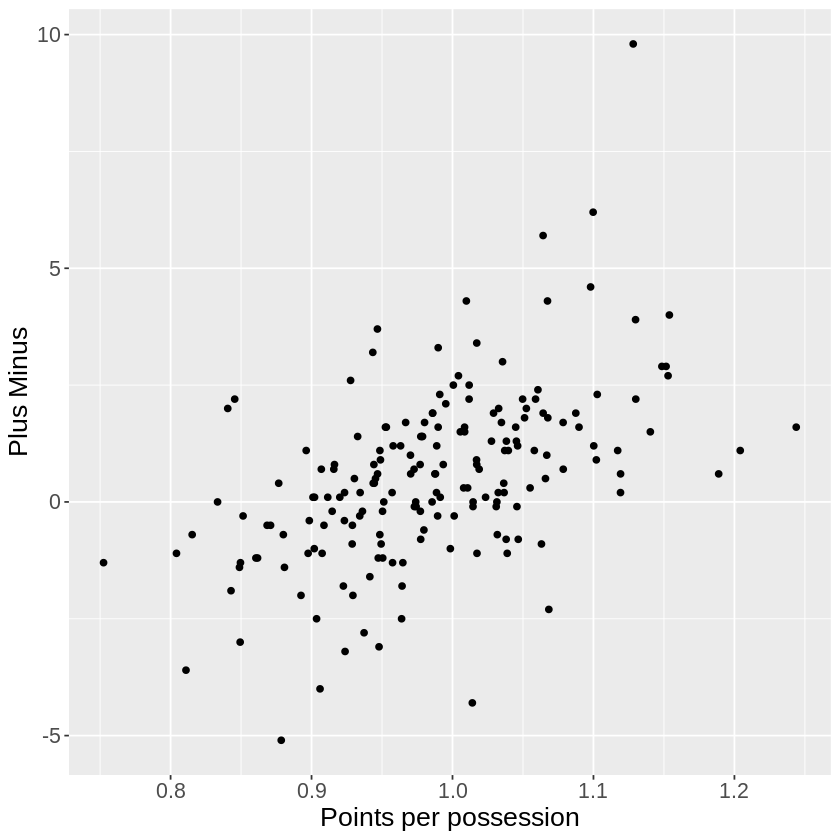

In [6]:
pts_plot <- ggplot(lineup_train, aes(x = PTS, y = P_M)) + geom_point() +
            xlab("Points") + ylab("Plus Minus") + theme(text = element_text(size=16))

fgp_plot <- ggplot(lineup_train, aes(x = FGP, y = P_M)) + geom_point() +
            xlab("Field Goals Percentage") + ylab("Plus Minus") + theme(text = element_text(size=16))

pir_plot <- ggplot(lineup_train, aes(x = PIR, y = P_M)) + geom_point() +
            xlab("Performance index rating") + ylab("Plus Minus") + theme(text = element_text(size=16))

tsp_plot <- ggplot(lineup_train, aes(x = TSP, y = P_M)) + geom_point() +
            xlab("True Shooting Percentage") + ylab("Plus Minus") + theme(text = element_text(size=16))

ppp_plot <- ggplot(lineup_train, aes(x = PPP, y = P_M)) + geom_point() +
            xlab("Points per possession") + ylab("Plus Minus") + theme(text = element_text(size=16))

pts_plot
fgp_plot
pir_plot
tsp_plot
ppp_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.0746711,5,0.09211554,Preprocessor1_Model01
1,rsq,standard,0.1285123,5,0.02754578,Preprocessor1_Model01
2,rmse,standard,1.9060777,5,0.12498822,Preprocessor1_Model02
2,rsq,standard,0.1850149,5,0.03493251,Preprocessor1_Model02
3,rmse,standard,1.8625204,5,0.11417843,Preprocessor1_Model03
3,rsq,standard,0.1567627,5,0.03885063,Preprocessor1_Model03
4,rmse,standard,1.8524483,5,0.12083491,Preprocessor1_Model04
4,rsq,standard,0.1459343,5,0.04283774,Preprocessor1_Model04
5,rmse,standard,1.7924811,5,0.10744925,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,rmse,standard,1.579965,5,0.1137303,Preprocessor1_Model25


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.3686631
rsq,standard,0.3742821
mae,standard,1.0371875


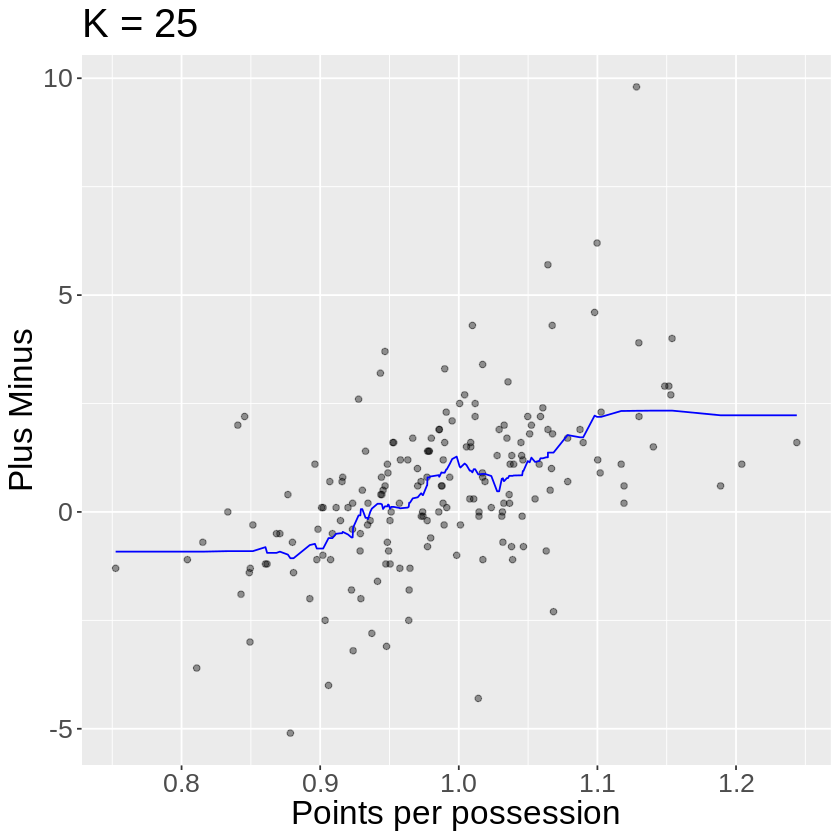

In [12]:
lineup_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

lineup_recipe <- recipe(P_M ~ PPP, data = lineup_train) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

lineup_vfold <- vfold_cv(lineup_train, v = 5, strata = P_M)

gridvals <- tibble(neighbors = seq(1, 30))

lineup_results <- workflow() |> 
    add_recipe(lineup_recipe) |> 
    add_model(lineup_spec) |>
    tune_grid(resamples = lineup_vfold, grid = gridvals) |> 
    collect_metrics()

# show all the results
lineup_results

# show only the row of minimum RMSPE
lineup_min <- lineup_results |>
   filter(.metric == "rmse") |>
   arrange(mean) |> 
   head(1)

lineup_min


k_min <- lineup_min |>
         pull(neighbors)

lineup_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

lineup_best_fit <- workflow() |>
         add_recipe(lineup_recipe) |>
         add_model(lineup_best_spec) |>
         fit(data = lineup_train)

lineup_summary <- lineup_best_fit |>
          predict(lineup_test) |>
          bind_cols(lineup_test) |>
          metrics(truth = P_M, estimate = .pred)

lineup_summary



lineup_preds <- lineup_best_fit |>
  predict(lineup_train) |>
  bind_cols(lineup_train)

lineup_plot <- ggplot(lineup_preds, aes(x = PPP, y = P_M)) +
  geom_point(alpha = 0.4) +
  labs(x = "Points per possession",
       y = "Plus Minus") +
  geom_line(data = lineup_preds, aes(x = PPP, y = .pred), color = "blue") +
  ggtitle(paste0("K = ", k_min)) +
  theme(text = element_text(size = 20))

lineup_plot

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          PPP  
     -10.97        11.69  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.3438128
rsq,standard,0.4028978
mae,standard,0.9860755


`geom_smooth()` using formula 'y ~ x'

Warning message:
“`pull_workflow_fit()` was deprecated in workflows 0.2.3.
Please use `extract_fit_parsnip()` instead.”


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.97247,1.415344,-7.752516,5.931493e-13
PPP,11.68884,1.430132,8.173263,4.728808e-14


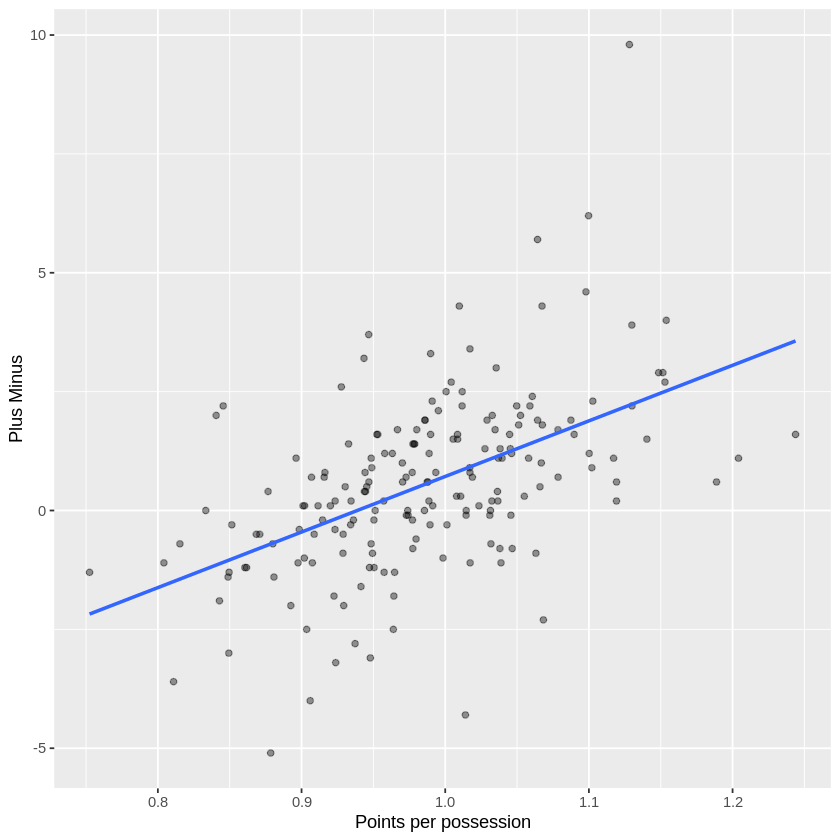

In [13]:
lineup_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lineup_recipe <- recipe(P_M ~ PPP, data = lineup_train)

lineup_fit <- workflow() |>
  add_recipe(lineup_recipe) |>
  add_model(lineup_spec) |>
  fit(data = lineup_train)
lineup_fit


lineup_test_results <- lineup_fit |>
  predict(lineup_test) |>
  bind_cols(lineup_test) |>
  metrics(truth = P_M, estimate = .pred)

lineup_test_results


# Take this step if you want the RMSPE value.
lineup_rmspe <- lineup_test_results |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()



lineup_plot_final <- ggplot(lineup_train, aes(x = PPP, y = P_M)) +
  geom_point(alpha = 0.4) +
  xlab("Points per possession") +
  ylab("Plus Minus") +
  geom_smooth(method = "lm", se = FALSE)
lineup_plot_final

coeffs <- lineup_fit |>
             pull_workflow_fit() |>
             tidy()
coeffs

In [14]:
lineup_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

lineup_recipe <- recipe(P_M ~ PPP + TSP, data = lineup_train) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

lineup_vfold <- vfold_cv(lineup_train, v = 5, strata = P_M)

gridvals <- tibble(neighbors = seq(1, 30))

lineup_results <- workflow() |> 
    add_recipe(lineup_recipe) |> 
    add_model(lineup_spec) |>
    tune_grid(resamples = lineup_vfold, grid = gridvals) |> 
    collect_metrics()

# show all the results
lineup_results

# show only the row of minimum RMSPE
lineup_min <- lineup_results |>
   filter(.metric == "rmse") |>
   arrange(mean) |> 
   head(1)

lineup_min


k_min <- lineup_min |>
         pull(neighbors)

lineup_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

lineup_best_fit <- workflow() |>
         add_recipe(lineup_recipe) |>
         add_model(lineup_best_spec) |>
         fit(data = lineup_train)

lineup_summary <- lineup_best_fit |>
          predict(lineup_test) |>
          bind_cols(lineup_test) |>
          metrics(truth = P_M, estimate = .pred)

lineup_summary

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.1865752,5,0.12640649,Preprocessor1_Model01
1,rsq,standard,0.1063945,5,0.02249877,Preprocessor1_Model01
2,rmse,standard,1.8873272,5,0.14736495,Preprocessor1_Model02
2,rsq,standard,0.1634352,5,0.04202417,Preprocessor1_Model02
3,rmse,standard,1.7585966,5,0.12838356,Preprocessor1_Model03
3,rsq,standard,0.1994885,5,0.04913781,Preprocessor1_Model03
4,rmse,standard,1.7109520,5,0.11858205,Preprocessor1_Model04
4,rsq,standard,0.2265812,5,0.05527463,Preprocessor1_Model04
5,rmse,standard,1.6788286,5,0.14081963,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,rmse,standard,1.564803,5,0.1254559,Preprocessor1_Model19


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.3719574
rsq,standard,0.3678854
mae,standard,1.0388158


In [15]:
lineup_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lineup_recipe <- recipe(P_M ~ PPP + TSP, data = lineup_train)

lineup_fit <- workflow() |>
  add_recipe(lineup_recipe) |>
  add_model(lineup_spec) |>
  fit(data = lineup_train)
lineup_fit


lineup_test_results <- lineup_fit |>
  predict(lineup_test) |>
  bind_cols(lineup_test) |>
  metrics(truth = P_M, estimate = .pred)

lineup_test_results


# Take this step if you want the RMSPE value.
lineup_rmspe <- lineup_test_results |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

coeffs <- lineup_fit |>
             pull_workflow_fit() |>
             tidy()
coeffs

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          PPP  
     -10.97        11.69  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.3438128
rsq,standard,0.4028978
mae,standard,0.9860755


Warning message:
“`pull_workflow_fit()` was deprecated in workflows 0.2.3.
Please use `extract_fit_parsnip()` instead.”


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.97247,1.415344,-7.752516,5.931493e-13
PPP,11.68884,1.430132,8.173263,4.728808e-14
